In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import cv2
import glob
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [0]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
#print(objp[:,:2])
folder = '/content/drive/My Drive/CV_Lab_5_images'
images = glob.glob(os.path.join(folder, '*.jpg'))

objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [8., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [8., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [8., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [8., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5

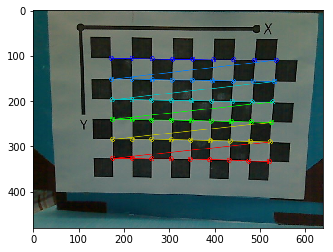

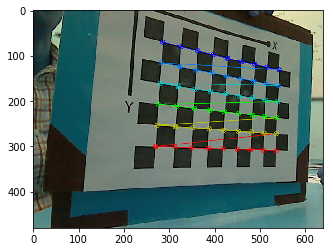

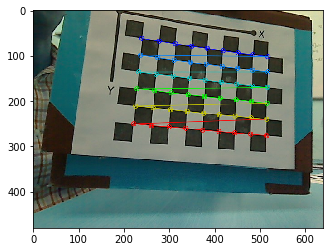

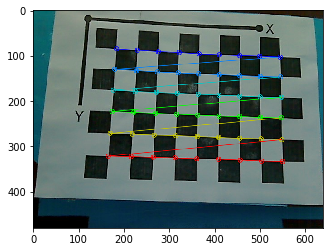

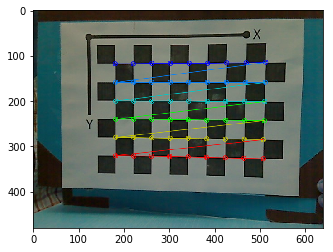

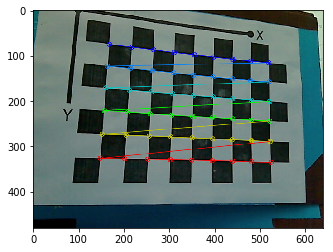

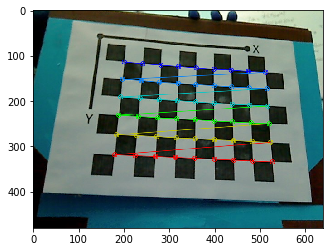

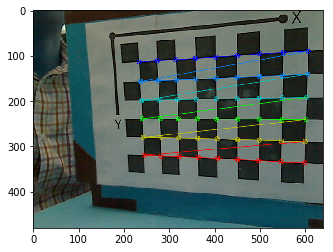

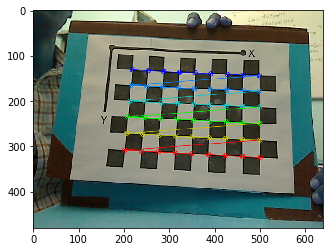

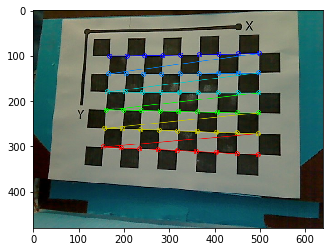

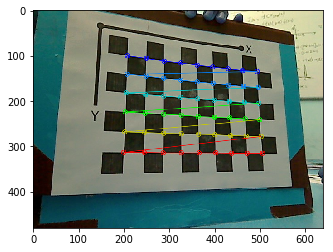

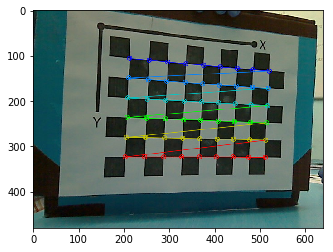

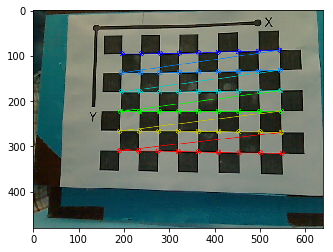

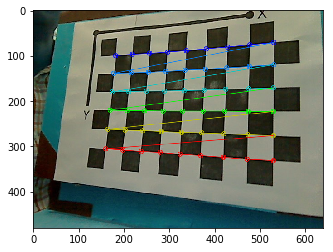

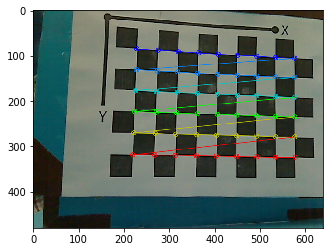

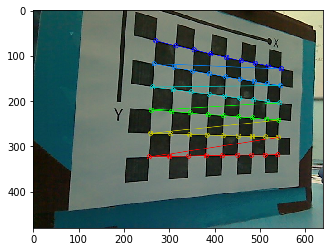

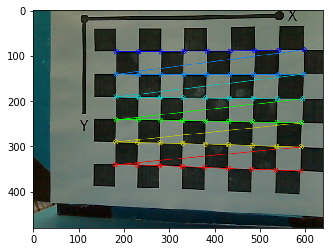

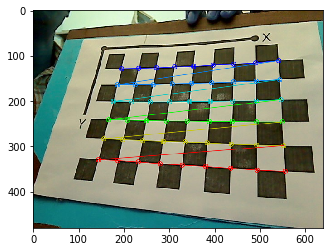

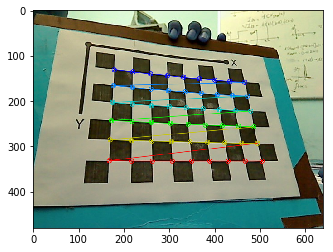

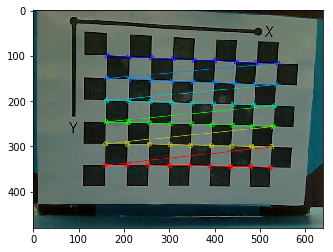

In [0]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None) # Size of square = (9,6)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
        plt.imshow(img)
        plt.show()
        

In [0]:
print(len(objpoints)) # 3D corner points
print(objpoints[0])

#print(imgpoints)
# pattern_size = (9, 6)
# pattern_points = np.zeros( (np.prod(pattern_size), 3), np.float32)
# pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2).astype(np.float32)
# pattern_points = np.array(pattern_points,dtype=np.float32)
# print(pattern_points)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None) 
#It returns the camera matrix, distortion coefficients, rotation and translation vectors etc.

20
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]]


In [0]:
print('Mtrix:',mtx)
print('Distance',dist)
print('rvecs',rvecs[0])
print('tvecs',tvecs)
img = cv2.imread('/content/drive/My Drive/CV_Lab_5_images/WIN_20190911_17_46_39_Pro.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))#0 and 1 alpha parameter
#https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html

Mtrix: [[544.7639419    0.         318.40645859]
 [  0.         549.36438592 218.25462863]
 [  0.           0.           1.        ]]
Distance [[ 0.11896198 -0.1175462  -0.00837272 -0.00290169 -0.20175268]]
rvecs [[0.11780259]
 [0.01890762]
 [0.01705703]]
tvecs [array([[-3.24195953],
       [-2.47816017],
       [12.25829304]]), array([[-0.71600209],
       [-3.22850725],
       [12.19744177]]), array([[-2.08615049],
       [-4.11435375],
       [14.80026532]]), array([[-2.9278604 ],
       [-2.85213909],
       [12.02201792]]), array([[-3.38097133],
       [-2.46106078],
       [13.59874083]]), array([[-3.0844406 ],
       [-2.8924873 ],
       [11.33326791]]), array([[-2.9139867 ],
       [-2.54701811],
       [13.70476291]]), array([[-2.00225611],
       [-2.46925119],
       [13.08462484]]), array([[-2.86911288],
       [-2.46987861],
       [15.87132985]]), array([[-3.75912508],
       [-2.93426638],
       [13.98973874]]), array([[-2.65796182],
       [-2.79014041],
       [13.28

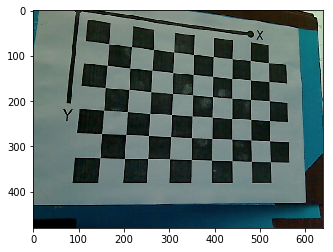

In [0]:
img_original = cv2.imread('/content/drive/My Drive/CV_Lab_5_images/WIN_20190911_17_46_39_Pro.jpg')
plt.imshow(img_original)

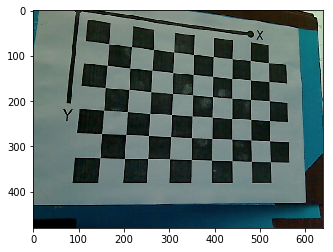

(0, 0, 640, 480)


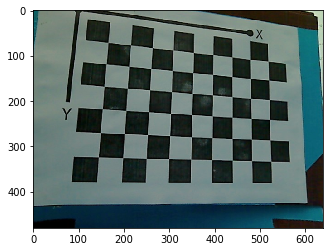

(480, 640)
(480, 640, 3)


In [0]:
# undistort
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image


plt.imshow(img)
plt.show()

# crop the image
x,y,w,h = roi
print(roi)
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)
plt.show()
print(img.shape[:2])
print(dst.shape)

In [0]:
mean_error = 0

print(len(objpoints))
#print(rvecs[0])
#print(tvecs)
#print(mtx)
#print(dist)
print(len(imgpoints))
print(len(rvecs))
print(len(tvecs))
for i in range(len(objpoints)):
    #print(objpoints[i])
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)

    
    mean_error += error

print("total error: ", mean_error/len(objpoints))

20
20
20
20
total error:  0.05139943276256348
